# 🌏 **Day 11: Real-World Data Integration and Creative API Use**

🔑 **Core Focus: Project-Ready Data Parsing from Real APIs**  

Learned how to use APIs and interpret their responses. Now it’s time to extract structured insights from real-world data, just like a data engineer or analyst would do in the backend of a product or dashboard.

---

## 📘 What to do:

### 🧩 1. Real Dataset Extraction & Cleaning

- Access and pull **real-world JSON data** from a public API.
- Identify the **relevant structure** and fields (ignore noisy or nested junk).
- Extract only the **useful information** into structured tabular format (using `pandas`).

### 📈 2. Convert JSON → DataFrame like a Pro

- Learn to flatten nested JSON fields.
- Deal with missing keys, multiple levels (deep nesting), and type mismatches.
- Explore `json_normalize()` and `pd.DataFrame([...])`.

### ⚠️ 3. Practice with Complex Structures

- You’ll work with at least 1 **complex JSON** API and turn it into a clean, usable DataFrame.

---

## 💻 Hands-On API Today

We’ll use the **"Open Notify" API** that gives the number of people currently in space:

```
http://api.open-notify.org/astros.json

```

Sample Response:

```json
{
  "people": [
    {"name": "Oleg Kononenko", "craft": "ISS"},
    {"name": "Satoshi Furukawa", "craft": "ISS"}
  ],
  "message": "success",
  "number": 7
}

```

You’ll:

- Extract the astronauts’ names and crafts.
- Make a clean `DataFrame` with columns: `"Astronaut"`, `"Craft"`.

Then go one level higher with a **more nested JSON**:

```
plaintext
CopyEdit
https://date.nager.at/api/v3/PublicHolidays/2024/IN

```

This gives public holidays in India. Your task:

- Extract `"date"`, `"localName"`, `"name"`, `"launchYear"` into a structured table.
- Format dates, handle missing values, and convert to a usable format.

---

## ✅ Task:

1. 📥 Use both APIs and fetch the data using `requests`.
2. 📊 Convert them into **clean DataFrames**.
3. 📤 Save the DataFrames as CSVs.
4. 📌 *Bonus*: Try making a simple **bar chart** showing number of astronauts per craft.

---

In [1]:
import requests
import json

url = 'http://api.open-notify.org/astros.json'

response = requests.get(url)
data = response.json()

print(json.dumps(data, indent=2))

{
  "people": [
    {
      "craft": "ISS",
      "name": "Oleg Kononenko"
    },
    {
      "craft": "ISS",
      "name": "Nikolai Chub"
    },
    {
      "craft": "ISS",
      "name": "Tracy Caldwell Dyson"
    },
    {
      "craft": "ISS",
      "name": "Matthew Dominick"
    },
    {
      "craft": "ISS",
      "name": "Michael Barratt"
    },
    {
      "craft": "ISS",
      "name": "Jeanette Epps"
    },
    {
      "craft": "ISS",
      "name": "Alexander Grebenkin"
    },
    {
      "craft": "ISS",
      "name": "Butch Wilmore"
    },
    {
      "craft": "ISS",
      "name": "Sunita Williams"
    },
    {
      "craft": "Tiangong",
      "name": "Li Guangsu"
    },
    {
      "craft": "Tiangong",
      "name": "Li Cong"
    },
    {
      "craft": "Tiangong",
      "name": "Ye Guangfu"
    }
  ],
  "number": 12,
  "message": "success"
}


In [2]:
import pandas as pd

names = []
crafts = []

for i in range(len(data['people'])):
    names.append(data['people'][i]['name'])
    crafts.append(data['people'][i]['craft'])

astro_df = pd.DataFrame({
    'Astronaut': names,
    'craft': crafts
})

In [3]:
astro_df.head()

,Astronaut,craft
0,Oleg Kononenko,ISS
1,Nikolai Chub,ISS
2,Tracy Caldwell Dyson,ISS
3,Matthew Dominick,ISS
4,Michael Barratt,ISS


In [4]:
astro_df.to_csv('Astronaut.csv')

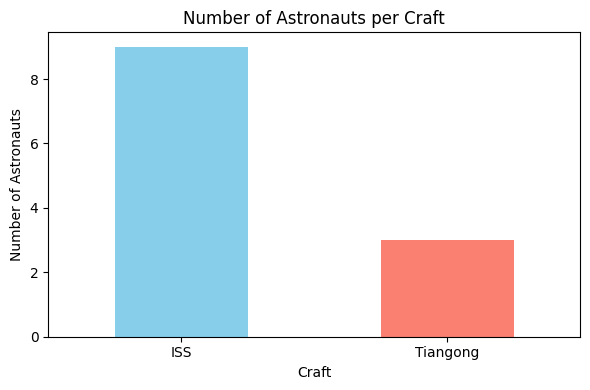

In [5]:
import matplotlib.pyplot as plt 

count = astro_df['craft'].value_counts()

plt.figure(figsize=(6, 4))
count.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Number of Astronauts per Craft')
plt.xlabel('Craft')
plt.ylabel('Number of Astronauts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Another API:

In [6]:
import os 
from dotenv import load_dotenv
load_dotenv()


url = 'https://calendarific.com/api/v2/holidays'
api_key = os.getenv("CALENDARIFIC_API_KEY")

params = {
    "api_key": api_key,
    "country": "IN",
    "year": "2024"
}

response = requests.get(url, params=params)
data = response.json()

print(json.dumps(data, indent=2))

{
  "meta": {
    "code": 200
  },
  "response": {
    "holidays": [
      {
        "name": "New Year's Day",
        "description": "New Year\u2019s Day is celebrated many countries such as in India on the January 1 in the Gregorian calendar.",
        "country": {
          "id": "in",
          "name": "India"
        },
        "date": {
          "iso": "2024-01-01",
          "datetime": {
            "year": 2024,
            "month": 1,
            "day": 1
          }
        },
        "type": [
          "Optional holiday"
        ],
        "primary_type": "Restricted Holiday",
        "canonical_url": "https://calendarific.com/holiday/india/new-year-day",
        "urlid": "india/new-year-day",
        "locations": "All",
        "states": "All"
      },
      {
        "name": "Lohri",
        "description": "Lohri is a restricted holiday in India",
        "country": {
          "id": "in",
          "name": "India"
        },
        "date": {
          "iso": "2024-01-

In [7]:
data['response']['holidays'][0]['name']
data['response']['holidays'][0]['date']['iso']
data['response']['holidays'][0]['type']
data['response']['holidays'][0]['description']
data['response']['holidays'][0]['locations']


'All'

In [8]:
no_of_holdidays = len(data['response']['holidays'])

In [9]:
from datetime import datetime

iso_string = data['response']['holidays'][0]['date']['iso']
date_obj = datetime.strptime(iso_string, '%Y-%m-%d').date()

print(iso_string)
print(date_obj)
print(type(iso_string))
print(type(date_obj))

2024-01-01
2024-01-01
<class 'str'>
<class 'datetime.date'>


In [10]:
import numpy as np
from datetime import datetime

Name, date, Type, Description, Locations = [],[],[],[],[]

for i in range(no_of_holdidays):
    Name.append(data['response']['holidays'][i]['name'])
    
    date_string = data['response']['holidays'][i]['date']['iso']
    date.append(datetime.fromisoformat(date_string).date())
    
    Type.append(data['response']['holidays'][i]['type'])
    
    Description.append(data['response']['holidays'][i]['description'])
    
    Locations.append(data['response']['holidays'][i]['locations'])



In [11]:
df = pd.DataFrame({
    'Name' : Name,
    'Date' : date,
    'Type' : Type,
    'Description' : Description,
    'Location' : Locations
})

df.head()

,Name,Date,Type,Description,Location
0,New Year's Day,2024-01-01,[Optional holiday],New Year’s Day is celebrated many countries su...,All
1,Lohri,2024-01-13,[Optional holiday],Lohri is a restricted holiday in India,All
2,Makar Sankranti,2024-01-14,"[Hinduism, Optional holiday]",Makar Sankranti is a restricted holiday in India,All
3,Pongal,2024-01-15,"[Hinduism, Optional holiday]","Many southern states in India, particularly Ta...",All
4,Guru Govind Singh Jayanti,2024-01-17,[Optional holiday],Guru Gobind Singh Jayanti is the Sikh annual c...,All


In [12]:
df.describe()

,Name,Date,Type,Description,Location
count,75,75,75,75,75
unique,75,65,8,75,1
top,New Year's Day,2024-04-09,[Optional holiday],New Year’s Day is celebrated many countries su...,All
freq,1,3,23,1,75


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         75 non-null     object
 1   Date         75 non-null     object
 2   Type         75 non-null     object
 3   Description  75 non-null     object
 4   Location     75 non-null     object
dtypes: object(5)
memory usage: 3.1+ KB


In [14]:
df['Type_as_str'] = df['Type'].astype(str)
print(df['Type_as_str'].unique())

["['Optional holiday']" "['Hinduism', 'Optional holiday']"
 "['National holiday']" "['Observance']" "['Season']"
 "['National holiday', 'Hinduism']" "['Observance', 'Christian']"
 "['Observance', 'Hinduism']"]


In [15]:
df.to_csv('Holidays_India.csv', index=False)

---

### 🗂️ Comparison: `strptime()` vs `fromisoformat()`

| Feature | `datetime.strptime()` | `datetime.fromisoformat()` |
| --- | --- | --- |
| ✅ Handles pure date (`YYYY-MM-DD`) | ✅ Yes | ✅ Yes |
| ✅ Handles full ISO datetime (`T`, time, timezone) | ❌ No – will raise error if extra data remains | ✅ Yes – handles time & timezone gracefully |
| 🔒 Strict format matching | ✅ Yes – format must exactly match | ❌ No – automatically parses ISO structure |
| 📅 Use when | Format is known and consistent | Input is in ISO format, may vary (date/time) |
| 🧠 Flexibility | Low | High |
| 🧱 Requires format string | ✅ Yes (`'%Y-%m-%d'`, etc.) | ❌ No – built-in support |
| 🐍 Python version required | All versions (old & new) | Python 3.7+ |

## 📝 Summary:

| Concept | What to Focus On |
| --- | --- |
| Real API Parsing | Understanding structure, filtering only what matters |
| `json_normalize()` | Flatten nested data |
| Data Cleaning | Handle missing, nested, or extra info |
| Conversion | JSON ➝ Dict ➝ DataFrame ➝ CSV |